In [21]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from typing import TypedDict
from IPython.display import Image
from dotenv import load_dotenv
import os

In [14]:
load_dotenv()
GROQ_API_KEY = os.environ.get('GROQ_API_KEY')

In [15]:
model = ChatGroq(model="llama-3.3-70b-versatile")
model

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001C21E0F8E50>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001C21ED35650>, model_name='llama-3.3-70b-versatile', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [16]:
# Define state
class LLMState(TypedDict):
    question: str
    answer: str

In [17]:
def llm_QA(state: LLMState) -> LLMState:
    # extract the question from state
    question = state['question']
    
    # create a prompt
    prompt = f'answer the following question{question}'
    
    # ask any question to the llm
    answer = model.invoke(prompt).content
    
    # update the answer in the state
    state['answer'] = answer
    
    return state

In [ ]:
#create graph
graph = StateGraph(LLMState)

# add nodes
graph.add_node('llm_QA', llm_QA)

# add edges
graph.add_edge(START, 'llm_QA') 
graph.add_edge('llm_QA', END) 

# compile the graph
workflow = graph.compile()

In [23]:
# execute the graph
initial_state = {'question': 'how far is moon from the earth?'}
final_state = workflow.invoke(initial_state)
print(final_state['answer'])

The average distance from the Earth to the Moon is approximately **384,400 kilometers (238,900 miles)**. This distance is constantly changing due to the elliptical shape of the Moon's orbit around our planet.

At its closest point (called perigee), the Moon is about **356,400 kilometers (221,500 miles)** away from Earth. And at its farthest point (apogee), the distance is around **405,500 kilometers (252,000 miles)**.

It's worth noting that the Moon's orbit is not a perfect circle and is influenced by the gravitational pull of the Sun and other celestial bodies, which causes the distance between the Earth and the Moon to vary slightly over time.


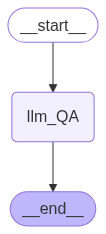

In [22]:
Image(workflow.get_graph().draw_mermaid_png())

In [24]:
model.invoke('How far is moon from the earth?').content

"The average distance from the Earth to the Moon is approximately 384,400 kilometers (238,900 miles). This distance is constantly changing due to the elliptical shape of the Moon's orbit around the Earth. At its closest point (called perigee), the distance is about 356,400 kilometers (221,500 miles), and at its farthest point (apogee), the distance is about 405,500 kilometers (252,000 miles)."